## Analysis of LAMMPS MD output files & plot

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit

In [17]:
runs_per_conc=1
main_folder="../../384_surface/round2/750K_equil_by_steps/"
folders= ( "12_NH2", "24_NH2")#("0_NH2",  "4_NH2",  "8_NH2",  "12_NH2",  "16_NH2")
labels= ("$12 \, NH_2$", "$24 \, NH_2$") #("$0 \, NH_2$", "$4 \, NH_2$", "$8 \, NH_2$", "$12 \, NH_2$", "$16 \, NH_2$")
conc= [12,24] #[0,4,8,12,16]
dt=0.00025 #ps
equi_steps=400000

In [18]:
def reset_accu():
    accumulator=np.empty(0)
    accumulator2=np.empty(0)   
    return accumulator, accumulator2

In [19]:
def accu(data,accumulator,accumulator2,j):
    if(j==0):
        accumulator=data
        accumulator2=data*data
    else:
        accumulator+=data
        accumulator2+=data*data
    return accumulator, accumulator2

In [20]:
def comp_err(accumulator,accumulator2,N):
    return np.sqrt(accumulator2/N-accumulator/N*accumulator/N)*np.sqrt(1./N)

In [21]:
def linear(x,a):
    return a*x

### Li Diffusion

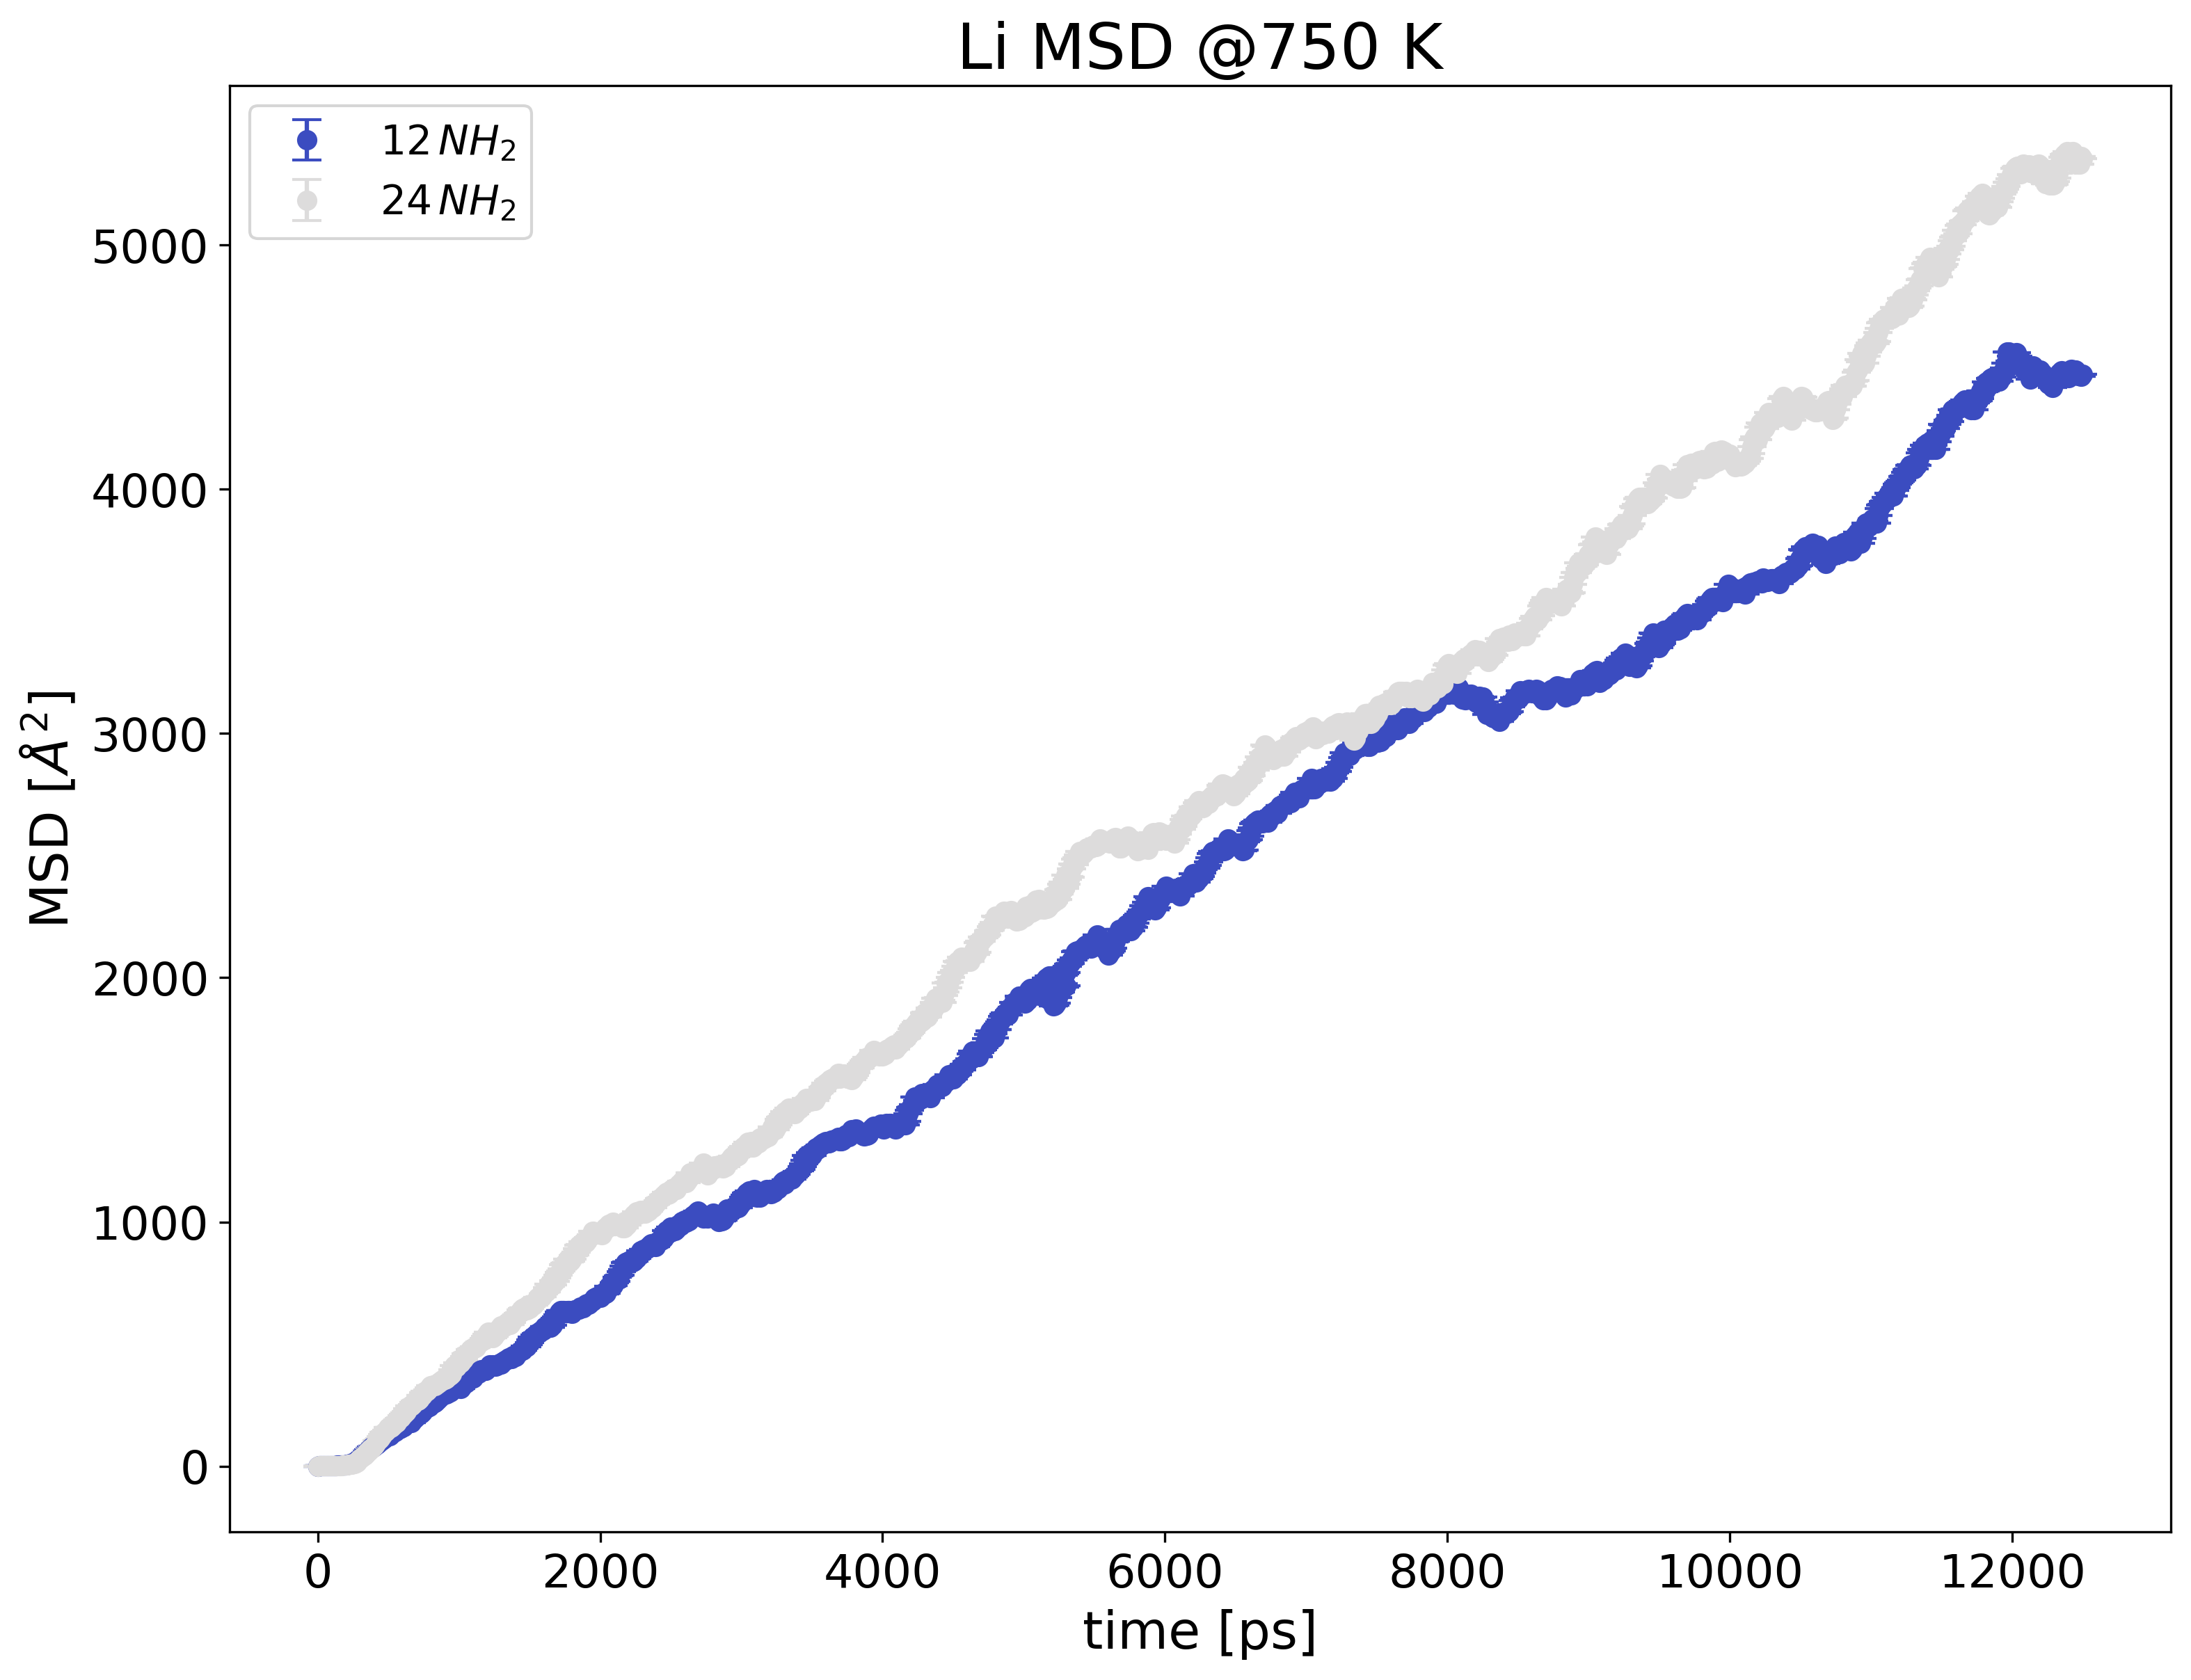

In [34]:
#set figure params
i=0
plt.figure(figsize=(12,9),dpi=300)
plt.ylabel("MSD [$\AA^2$]",fontsize=18)
plt.xlabel("time [ps]",fontsize=18)
p = plt.get_cmap('coolwarm')

freq=10

for f in folders:
    j=0
    accumulator,accumulator2=reset_accu()
    
    for r in range (0,runs_per_conc):
        file=main_folder+"/"+str(f)+"/run_"+str(r)+"/msd_Li.dat"
        time,data=np.loadtxt(file,unpack=True,usecols=(0,4,))
        accumulator,accumulator2=accu(data,accumulator,accumulator2,j)
        
        j+=1
    errors=comp_err(accumulator,accumulator2,runs_per_conc)   
    accumulator/=runs_per_conc
    
    plt.errorbar((time[::freq])*dt,accumulator[::freq],yerr=errors[::freq],capsize=5,marker='o',
                 label=labels[i],color=p(i/len(folders)),linestyle='none')
    i+=1
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=14)
plt.title("Li MSD @750 K",fontsize=22)
plt.show()

Let us now have a look at the same information, but through the diffusion coefficient

[2.4536368e-06]
[2.82104043e-06]


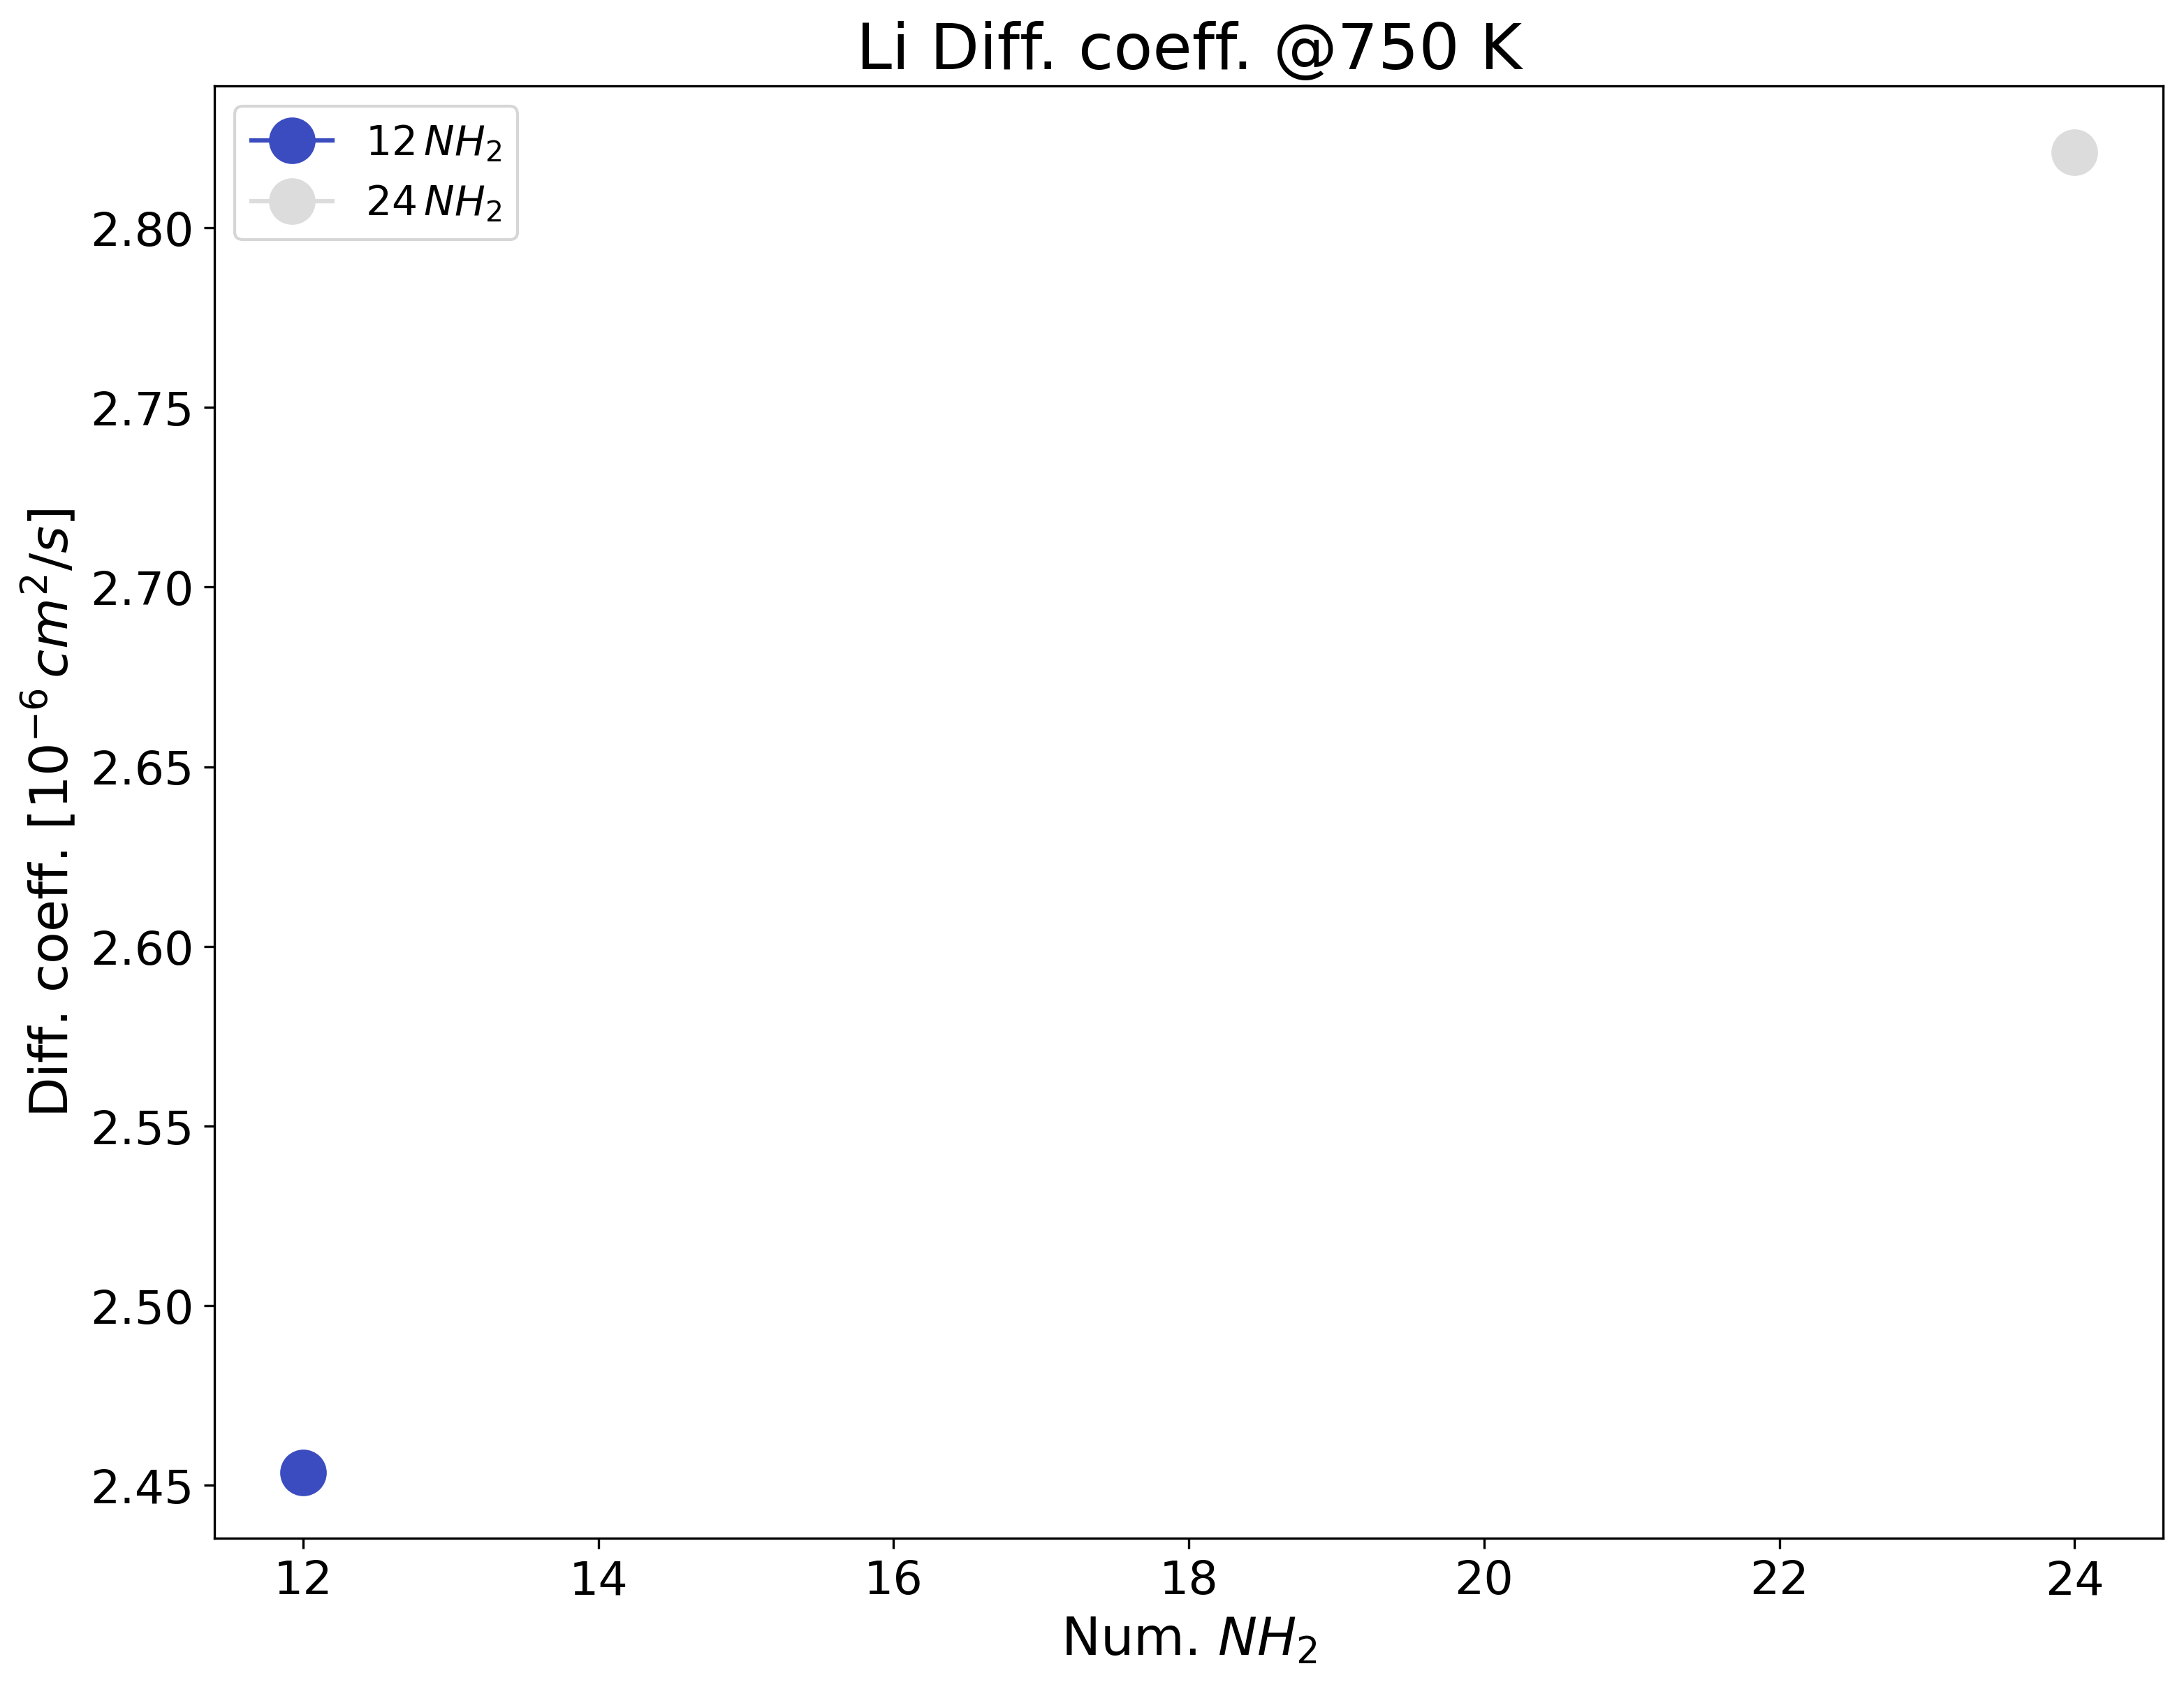

In [35]:
ang2ps_to_cm2s=1E-8

i=0
plt.figure(figsize=(12,9),dpi=300)
plt.ylabel("Diff. coeff. [$10^{-6} \, cm^2/s$]",fontsize=18)
plt.xlabel("Num. $NH_2$",fontsize=18)
p = plt.get_cmap('coolwarm')

freq=10

for f in folders:
    j=0
    accumulator,accumulator2=reset_accu()
    
    for r in range (0,runs_per_conc):
        file=main_folder+"/"+str(f)+"/run_"+str(r)+"/msd_Li.dat"
        time,data=np.loadtxt(file,unpack=True,usecols=(0,4,))
        accumulator,accumulator2=accu(data,accumulator,accumulator2,j)
        
        j+=1
    errors=comp_err(accumulator,accumulator2,runs_per_conc) 
    accumulator/=runs_per_conc
    
    popt,pcov=curve_fit(linear,time*dt,accumulator)
    diff=(popt*ang2ps_to_cm2s/(6*dt))
    #plt.errorbar((time[::freq])*dt,accumulator[::freq],yerr=errors[::freq],capsize=5,marker='o',label=labels[i],color=p(i/len(folders)),alpha=0.5)
    #plt.plot(np.linspace(0,max(time*dt),10),popt*np.linspace(0,max(time*dt),10),lw=8,linestyle='dashed',color=p(i/len(folders)))
    print(diff)
    plt.plot(conc[i],diff*1E6,marker='o',markersize=15,color=p(i/len(folders)),label=labels[i])
    i+=1
    
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=14)
plt.title("Li Diff. coeff. @750 K",fontsize=22)
plt.show()

### Models deviations

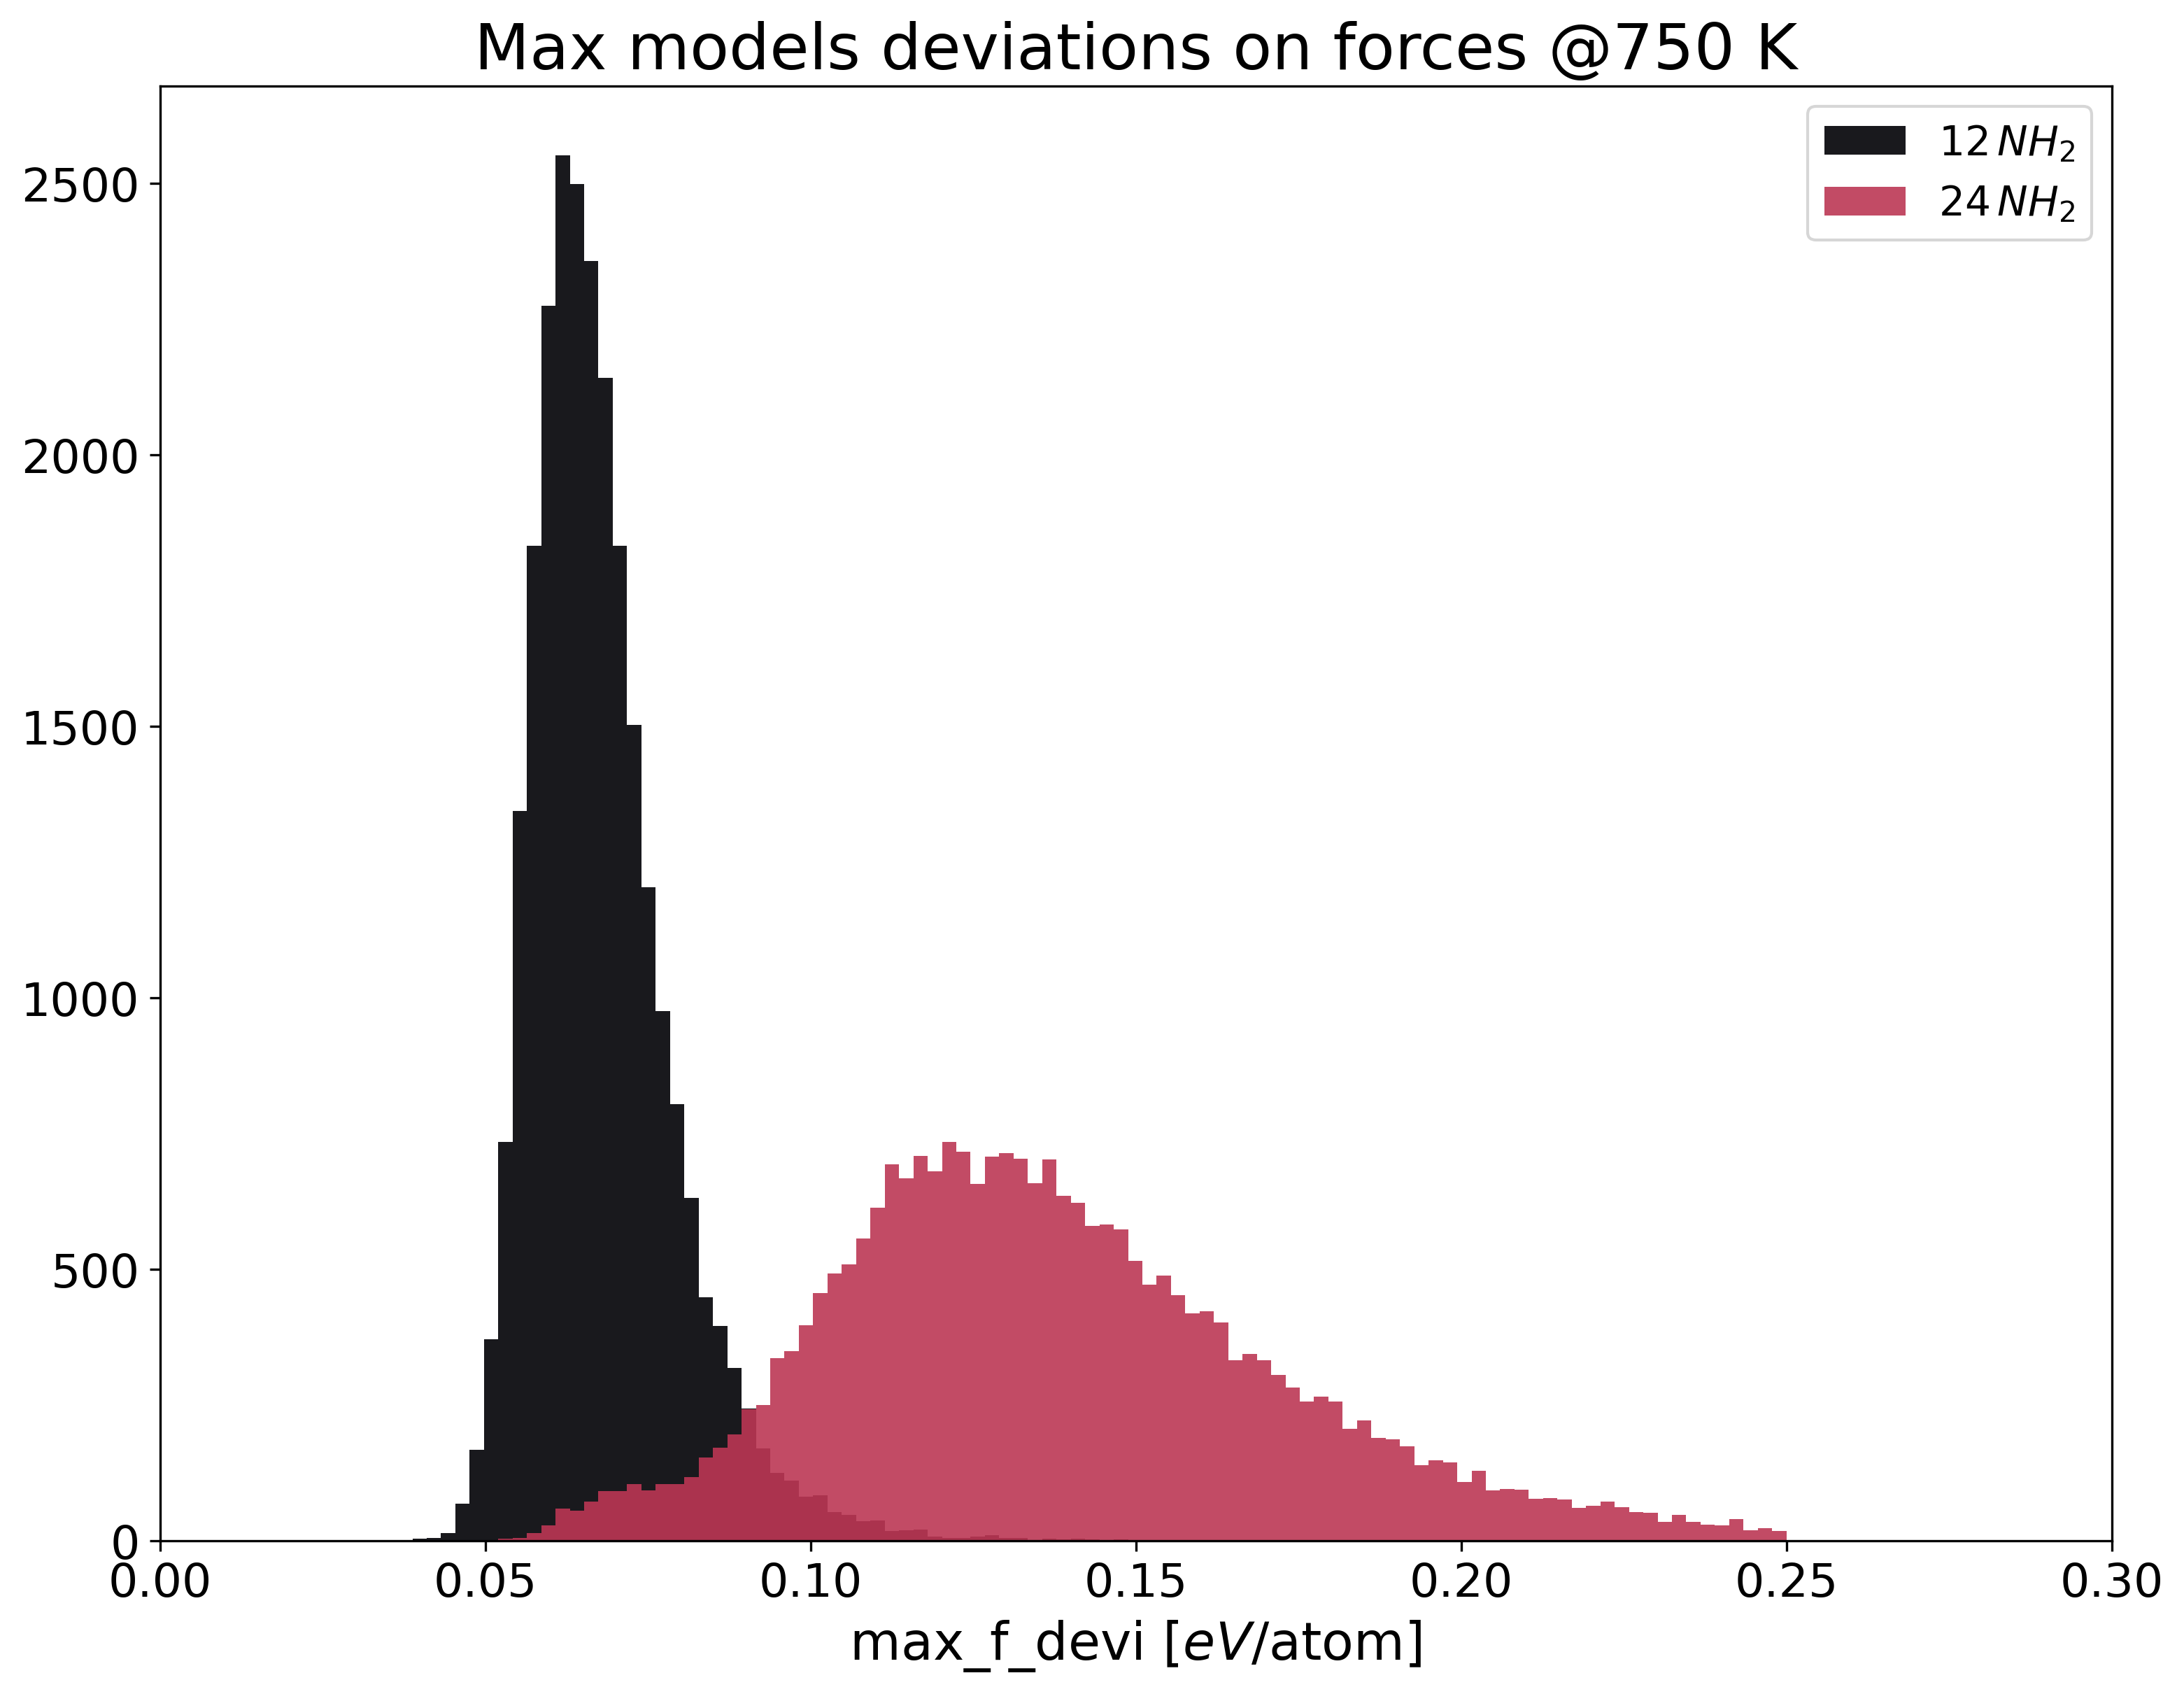

In [32]:
i=0
plt.figure(figsize=(12,9),dpi=300)
plt.xlabel("max_f_devi [$eV$/atom]",fontsize=18)
p = plt.get_cmap('inferno')

freq=1

for f in folders:
    j=0
    accumulator,accumulator2=reset_accu()
    
    for r in range (0,runs_per_conc):
        file=main_folder+"/"+str(f)+"/run_"+str(r)+"/model_devi.out"
        time,data=np.loadtxt(file,unpack=True,usecols=(0,4,))
        accumulator,accumulator2=accu(data,accumulator,accumulator2,j)
        
        j+=1
    errors=comp_err(accumulator,accumulator2,runs_per_conc)   
    accumulator/=runs_per_conc
    
    #if (f=="12_NH2"):
    #    plt.hist(accumulator[::freq],bins=100,label=labels[i],color=p(i/len(folders)),alpha=0.55)
    #else:
    plt.hist(accumulator[::freq],bins=100,label=labels[i],color=p(i/len(folders)),alpha=0.9,range=[0.03,0.25])
    i+=1
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0,0.3)
plt.legend(fontsize=14)
plt.title("Max models deviations on forces @750 K",fontsize=22)
plt.show()